In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load match related data

In [2]:

df_2014 = pd.read_csv("data/afl_results_2014.csv")
print(df_2014.shape)

df_2015 = pd.read_csv("data/afl_results_2015.csv")
print(df_2015.shape)

df_2016 = pd.read_csv("data/afl_results_2016.csv")
print(df_2016.shape)

df_2017 = pd.read_csv("data/afl_results_2017.csv")
print(df_2017.shape)

df_2018 = pd.read_csv("data/afl_results_2018.csv")
print(df_2018.shape)

df_2019 = pd.read_csv("data/afl_results_2019.csv")
print(df_2019.shape)
df_2020 = pd.read_csv("data/afl_results_2020.csv")
print(df_2020.shape)

df_all = pd.concat([df_2014, df_2015, df_2016, df_2018, df_2019, df_2020], axis=0)
print(df_all.shape)
df_all.columns

(207, 75)
(206, 75)
(207, 75)
(207, 75)
(207, 75)
(207, 75)
(162, 75)
(1196, 75)


Index(['match.name', 'match.date', 'match.status', 'match.matchId',
       'match.venue', 'match.utcStartTime', 'match.homeTeamId',
       'match.awayTeamId', 'match.round', 'match.venueLocalStartTime',
       'match.abbr', 'match.twitterHashTag', 'match.homeTeam.name',
       'match.homeTeam.timeZone', 'match.homeTeam.teamId',
       'match.homeTeam.abbr', 'match.homeTeam.nickname', 'match.awayTeam.name',
       'match.awayTeam.timeZone', 'match.awayTeam.teamId',
       'match.awayTeam.abbr', 'match.awayTeam.nickname', 'venue.address',
       'venue.name', 'venue.state', 'venue.timeZone', 'venue.venueId',
       'venue.abbreviation', 'venue.capacity', 'venue.groundDimension',
       'venue.latitude', 'venue.longitude', 'round.name', 'round.year',
       'round.roundId', 'round.abbreviation', 'round.competitionId',
       'round.roundNumber', 'status', 'matchId', 'scoreWorm', 'scoreMap',
       'lastUpdated', 'homeTeamScore.periodScore',
       'homeTeamScore.rushedBehinds', 'homeTeamS

In [3]:
df_fixture = pd.read_csv("data/fixture_2022.csv")
print(df_fixture.shape)
df_fixture.columns

df_next_games_teams = df_fixture[(df_fixture['status'] != "CONCLUDED") & (df_fixture['round.roundNumber'] == 2)]
df_next_games_teams = df_next_games_teams[['home.team.name','away.team.name']]
df_next_games_teams = df_next_games_teams.rename(columns={'home.team.name': 'match.homeTeam.name', 'away.team.name': 'match.awayTeam.name'})
df_next_games_teams

(198, 54)


,match.homeTeam.name,match.awayTeam.name
9,Western Bulldogs,Carlton
10,Sydney Swans,Geelong Cats
11,Collingwood,Adelaide Crows
12,Essendon,Brisbane Lions
13,Port Adelaide,Hawthorn
14,Gold Coast Suns,Melbourne
15,North Melbourne,West Coast Eagles
16,Richmond,GWS Giants
17,Fremantle,St Kilda


In [4]:
df_all.shape

(1196, 75)

In [5]:
df_all.sort_values('match.date', inplace=True)
df_all.reset_index(inplace=True)
df_all.drop('index', axis=1, inplace=True)

In [6]:
df_all.tail()

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,homeTeamScoreChart.rightPosters,homeTeamScoreChart.rushedBehinds,homeTeamScoreChart.touchedBehinds,awayTeamScoreChart.goals,awayTeamScoreChart.leftBehinds,awayTeamScoreChart.rightBehinds,awayTeamScoreChart.leftPosters,awayTeamScoreChart.rightPosters,awayTeamScoreChart.rushedBehinds,awayTeamScoreChart.touchedBehinds
1191,Richmond Vs St Kilda,2020-10-09 08:50:00,CONCLUDED,CD_M20200142001,CD_V81,2020-10-09T08:50:00,CD_T120,CD_T130,CD_R202001420,2020-10-09T18:50:00,...,0,2,0,6,1,5,1,1,4,1
1192,Geelong Cats Vs Collingwood,2020-10-10 08:40:00,CONCLUDED,CD_M20200142002,CD_V20,2020-10-10T08:40:00,CD_T70,CD_T40,CD_R202001420,2020-10-10T18:40:00,...,2,3,0,5,1,1,0,0,0,0
1193,Port Adelaide Vs Richmond,2020-10-16 08:50:00,CONCLUDED,CD_M20200142101,CD_V6,2020-10-16T08:50:00,CD_T110,CD_T120,CD_R202001421,2020-10-16T19:20:00,...,0,1,0,6,4,3,0,0,3,0
1194,Brisbane Lions Vs Geelong Cats,2020-10-17 08:40:00,CONCLUDED,CD_M20200142102,CD_V20,2020-10-17T08:40:00,CD_T20,CD_T70,CD_R202001421,2020-10-17T18:40:00,...,1,0,0,11,6,5,0,0,5,0
1195,Richmond Vs Geelong Cats,2020-10-24 08:30:00,CONCLUDED,CD_M20200142201,CD_V20,2020-10-24T08:30:00,CD_T120,CD_T70,CD_R202001422,2020-10-24T18:30:00,...,0,3,0,7,3,4,0,0,1,0


In [7]:
from pandas.plotting import scatter_matrix

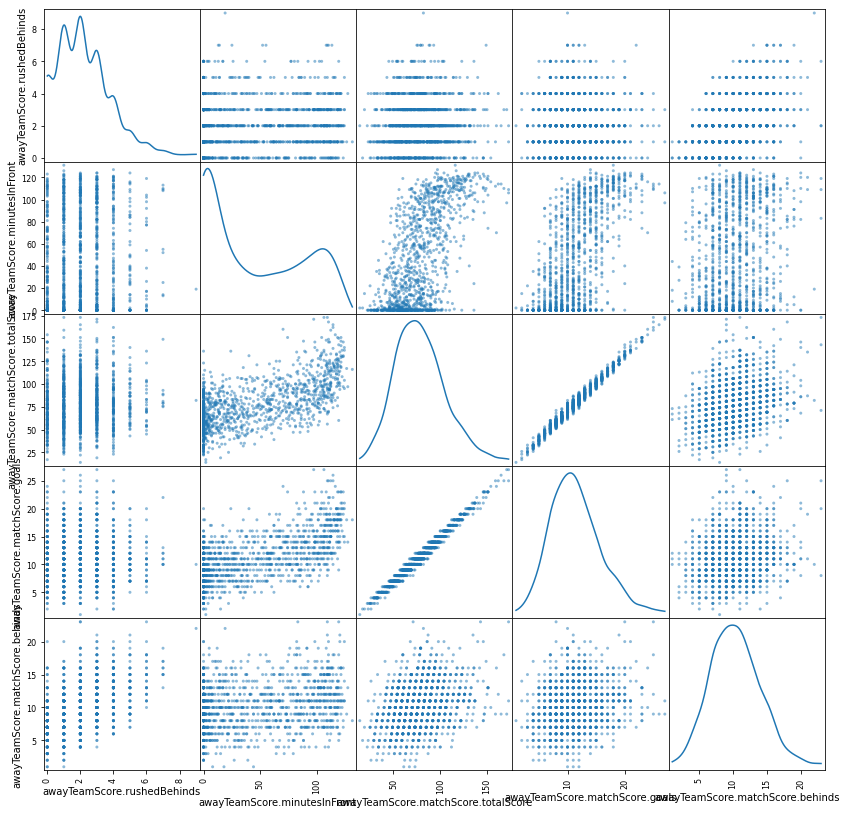

In [8]:
scatter_matrix(df_all[df_all.iloc[:,50:56].columns], diagonal='kde', figsize=(14,14));

In [9]:
# HTGDIFF: Home Team Goal Difference
# ATGDIFF: Away Team Goal Difference

df_all['HTGDIFF'] = df_all['homeTeamScore.matchScore.goals'] - df_all['awayTeamScore.matchScore.goals']
df_all['ATGDIFF'] = df_all['awayTeamScore.matchScore.goals'] - df_all['homeTeamScore.matchScore.goals']

## Calculate AVG goal difference for home and away team rolling 4 Games

In [10]:
def avg_goal_diff(df, avg_h_a_diff, a_h_team, a_h_goal_letter):
    """
    input: 
        df = dataframe with all results
        avg_h_a_diff = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    output: 
        avg_per_team = dictionary with with team as key and columns as values with new column H/ATGDIFF
    """
    df[avg_h_a_diff] = 0
    avg_per_team = {}
    all_teams = df[a_h_team].unique()
    for t in all_teams:
        df_team = df[df[a_h_team]==t].fillna(0)
        result = df_team['{}TGDIFF'.format(a_h_goal_letter)].rolling(4).mean()
        df_team[avg_h_a_diff] = result
        avg_per_team[t] = df_team
    return avg_per_team

In [11]:
d_AVGFTHG = avg_goal_diff(df_all, 'AVGHTGDIFF', 'match.homeTeam.name', 'H')

In [12]:
def from_dict_value_to_df(d):
    """
    input = dictionary 
    output = dataframe as part of all the values from the dictionary
    """
    df = pd.DataFrame()
    for v in d.values():
        df = pd.concat([df,v])
    return df

In [13]:
df_AVGFTHG = from_dict_value_to_df(d_AVGFTHG)
df_AVGFTHG.sort_index(inplace=True)

In [14]:
d_AVGFTAG = avg_goal_diff(df_AVGFTHG, 'AVGATGDIFF', 'match.awayTeam.name', 'A')
df_all = from_dict_value_to_df(d_AVGFTAG)
df_all.sort_index(inplace=True)
df_all['AVGATGDIFF'].fillna(0, inplace=True)

## Add per match game results from last three games

In [15]:
df_all['goal_diff'] = df_all['homeTeamScore.matchScore.goals'] - df_all['awayTeamScore.matchScore.goals']


for index, row in df_all[df_all['match.status']=='CONCLUDED'].iterrows():
    if df_all['goal_diff'][index] > 0:
        df_all.at[index,'result'] = 3   # 3 is a win
    elif df_all['goal_diff'][index] == 0:
        df_all.at[index,'result'] = 2  # 2 is a draw
    else:
        df_all.at[index,'result'] = 1  # 1 is a loss 

In [16]:
df_all.head()

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,awayTeamScoreChart.leftPosters,awayTeamScoreChart.rightPosters,awayTeamScoreChart.rushedBehinds,awayTeamScoreChart.touchedBehinds,HTGDIFF,ATGDIFF,AVGHTGDIFF,AVGATGDIFF,goal_diff,result
0,Collingwood Vs Fremantle,2014-03-14 08:50:00,CONCLUDED,CD_M20140140101,CD_V190,2014-03-14T08:50:00,CD_T40,CD_T60,CD_R201401401,2014-03-14T19:50:00,...,2,0,2,0,-12,12,0.0,0.0,-12,1.0
1,GWS Giants Vs Sydney Swans,2014-03-15 05:40:00,CONCLUDED,CD_M20140140102,CD_V43,2014-03-15T05:40:00,CD_T1010,CD_T160,CD_R201401401,2014-03-15T16:40:00,...,2,0,5,0,6,-6,0.0,0.0,6,3.0
2,Gold Coast Suns Vs Richmond,2014-03-15 08:40:00,CONCLUDED,CD_M20140140103,CD_V81,2014-03-15T08:40:00,CD_T1000,CD_T120,CD_R201401401,2014-03-15T18:40:00,...,0,1,1,0,2,-2,0.0,0.0,2,3.0
3,Carlton Vs Port Adelaide,2014-03-16 08:40:00,CONCLUDED,CD_M20140140104,CD_V190,2014-03-16T08:40:00,CD_T30,CD_T110,CD_R201401401,2014-03-16T19:40:00,...,3,0,2,0,-6,6,0.0,0.0,-6,1.0
4,Geelong Cats Vs Adelaide Crows,2014-03-20 08:10:00,CONCLUDED,CD_M20140140105,CD_V30,2014-03-20T08:10:00,CD_T70,CD_T10,CD_R201401401,2014-03-20T19:10:00,...,0,1,2,0,6,-6,0.0,0.0,6,3.0


In [17]:
def previous_data(df, h_or_a_team, column, letter, past_n):
    """
    input: 
        df = dataframe with all results
        a_h_team = HomeTeam or AwayTeam
        column = column selected to get previous data from
    output:
        team_with_past_dict = dictionary with team as a key and columns as values with new 
                              columns with past value
    """
    d = dict()
    team_with_past_dict = dict()
    all_teams = df[h_or_a_team].unique()
    for team in all_teams:
        n_games = len(df[df[h_or_a_team]==team])
        team_with_past_dict[team] = df[df[h_or_a_team]==team]
        for i in range(1, past_n):
            d[i] = team_with_past_dict[team].assign(
                result=team_with_past_dict[team].groupby(h_or_a_team)[column].shift(i)
            ).fillna({'{}_X'.format(column): 0})
            team_with_past_dict[team]['{}_{}_{}'.format(letter, column, i)] = d[i].result
    return team_with_past_dict

In [18]:
def previous_data_call(df, side, column, letter, iterations):
    d = previous_data(df, side, column, letter, iterations)
    df_result= from_dict_value_to_df(d)
    df_result.sort_index(inplace=True)
    return df_result

In [19]:
df_last_home_results = previous_data_call(df_all, 'match.homeTeam.name', 'result', 'H', 3)
df_last_away_results = previous_data_call(df_last_home_results, 'match.awayTeam.name', 'result', 'A', 3)

In [20]:
df_last_last_HTGDIFF_results = previous_data_call(df_last_away_results, 'match.homeTeam.name', 'HTGDIFF', 'H', 3)
df_last_last_ATGDIFF_results = previous_data_call(df_last_last_HTGDIFF_results, 'match.awayTeam.name', 'ATGDIFF', 'A', 3)

In [21]:
df_last_AVGFTHG_results = previous_data_call(df_last_last_ATGDIFF_results, 'match.homeTeam.name', 'AVGHTGDIFF', 'H', 2)
df_last_AVGFTAG_results = previous_data_call(df_last_AVGFTHG_results, 'match.awayTeam.name', 'AVGATGDIFF', 'A', 2)

In [22]:
df_all = df_last_AVGFTAG_results.copy()

In [23]:
df_all.shape

(1196, 91)

In [24]:
df_all

,match.name,match.date,match.status,match.matchId,match.venue,match.utcStartTime,match.homeTeamId,match.awayTeamId,match.round,match.venueLocalStartTime,...,H_result_1,H_result_2,A_result_1,A_result_2,H_HTGDIFF_1,H_HTGDIFF_2,A_ATGDIFF_1,A_ATGDIFF_2,H_AVGHTGDIFF_1,A_AVGATGDIFF_1
0,Collingwood Vs Fremantle,2014-03-14 08:50:00,CONCLUDED,CD_M20140140101,CD_V190,2014-03-14T08:50:00,CD_T40,CD_T60,CD_R201401401,2014-03-14T19:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GWS Giants Vs Sydney Swans,2014-03-15 05:40:00,CONCLUDED,CD_M20140140102,CD_V43,2014-03-15T05:40:00,CD_T1010,CD_T160,CD_R201401401,2014-03-15T16:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gold Coast Suns Vs Richmond,2014-03-15 08:40:00,CONCLUDED,CD_M20140140103,CD_V81,2014-03-15T08:40:00,CD_T1000,CD_T120,CD_R201401401,2014-03-15T18:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Carlton Vs Port Adelaide,2014-03-16 08:40:00,CONCLUDED,CD_M20140140104,CD_V190,2014-03-16T08:40:00,CD_T30,CD_T110,CD_R201401401,2014-03-16T19:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Geelong Cats Vs Adelaide Crows,2014-03-20 08:10:00,CONCLUDED,CD_M20140140105,CD_V30,2014-03-20T08:10:00,CD_T70,CD_T10,CD_R201401401,2014-03-20T19:10:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,Richmond Vs St Kilda,2020-10-09 08:50:00,CONCLUDED,CD_M20200142001,CD_V81,2020-10-09T08:50:00,CD_T120,CD_T130,CD_R202001420,2020-10-09T18:50:00,...,3.0,3.0,3.0,1.0,4.0,5.0,-1.0,1.0,5.25,1.75
1192,Geelong Cats Vs Collingwood,2020-10-10 08:40:00,CONCLUDED,CD_M20200142002,CD_V20,2020-10-10T08:40:00,CD_T70,CD_T40,CD_R202001420,2020-10-10T18:40:00,...,1.0,3.0,1.0,3.0,-3.0,12.0,1.0,-1.0,5.75,-1.75
1193,Port Adelaide Vs Richmond,2020-10-16 08:50:00,CONCLUDED,CD_M20200142101,CD_V6,2020-10-16T08:50:00,CD_T110,CD_T120,CD_R202001421,2020-10-16T19:20:00,...,3.0,3.0,3.0,1.0,4.0,7.0,-2.0,8.0,3.75,2.25
1194,Brisbane Lions Vs Geelong Cats,2020-10-17 08:40:00,CONCLUDED,CD_M20200142102,CD_V20,2020-10-17T08:40:00,CD_T20,CD_T70,CD_R202001421,2020-10-17T18:40:00,...,3.0,3.0,3.0,1.0,2.0,1.0,-4.0,1.0,2.75,0.50


In [25]:
df_matches_numeric = df_all._get_numeric_data()


In [26]:
df_matches_numeric.columns

Index(['match.homeTeam.timeZone', 'match.awayTeam.timeZone', 'venue.capacity',
       'venue.groundDimension', 'venue.latitude', 'venue.longitude',
       'round.year', 'round.roundNumber', 'scoreWorm', 'scoreMap',
       'homeTeamScore.rushedBehinds', 'homeTeamScore.minutesInFront',
       'homeTeamScore.matchScore.totalScore', 'homeTeamScore.matchScore.goals',
       'homeTeamScore.matchScore.behinds',
       'homeTeamScore.matchScore.superGoals', 'awayTeamScore.rushedBehinds',
       'awayTeamScore.minutesInFront', 'awayTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.goals', 'awayTeamScore.matchScore.behinds',
       'awayTeamScore.matchScore.superGoals', 'weather.tempInCelsius',
       'homeTeamScoreChart.goals', 'homeTeamScoreChart.leftBehinds',
       'homeTeamScoreChart.rightBehinds', 'homeTeamScoreChart.leftPosters',
       'homeTeamScoreChart.rightPosters', 'homeTeamScoreChart.rushedBehinds',
       'homeTeamScoreChart.touchedBehinds', 'awayTeamScoreChart.go

In [27]:
#df_matches_numeric.drop(['match.homeTeam.timeZone', 'match.awayTeam.timeZone', 'goal_diff', 'result', 'homeTeamScore.matchScore.goals', 'awayTeamScore.matchScore.goals'], axis=1, inplace=True)


df_matches_numeric = df_matches_numeric[['HTGDIFF','ATGDIFF','awayTeamScore.minutesInFront','homeTeamScore.minutesInFront','homeTeamScoreChart.goals','homeTeamScore.matchScore.totalScore','awayTeamScore.matchScore.totalScore','AVGHTGDIFF','round.year','awayTeamScoreChart.goals']]



df_matches_numeric.isnull().sum(axis = 0)

HTGDIFF                                0
ATGDIFF                                0
awayTeamScore.minutesInFront           0
homeTeamScore.minutesInFront           0
homeTeamScoreChart.goals               0
homeTeamScore.matchScore.totalScore    0
awayTeamScore.matchScore.totalScore    0
AVGHTGDIFF                             0
round.year                             0
awayTeamScoreChart.goals               0
dtype: int64

In [28]:
df_norm = (df_matches_numeric - df_matches_numeric.min()) / (df_matches_numeric.max() - df_matches_numeric.min())

In [29]:
df_norm.columns

Index(['HTGDIFF', 'ATGDIFF', 'awayTeamScore.minutesInFront',
       'homeTeamScore.minutesInFront', 'homeTeamScoreChart.goals',
       'homeTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.totalScore', 'AVGHTGDIFF', 'round.year',
       'awayTeamScoreChart.goals'],
      dtype='object')

In [30]:
predictable_columns = [
       'HTGDIFF', 'ATGDIFF', 'awayTeamScore.minutesInFront',
       'homeTeamScore.minutesInFront', 'homeTeamScoreChart.goals',
       'homeTeamScore.matchScore.totalScore',
       'awayTeamScore.matchScore.totalScore', 'AVGHTGDIFF', 'round.year',
       'awayTeamScoreChart.goals'
]

In [31]:
df_X = df_norm[predictable_columns]

In [32]:
df_X.fillna(0,inplace=True)

In [33]:
# Normal Rounds have 9 games
# Round 24 has 4 games
# Round 25 and 26 have 2 games
# Round 27 has 1 game

# + 9 per match day for normal rounds

#int_for_test = len(df_all)
#int_for_prediction = int_for_test - 9




In [34]:
df_all.shape

(1196, 91)

In [35]:
#X = df_X.iloc[:int_for_prediction,:]
#print(X.shape)
#Y = df_all.iloc[:int_for_prediction,:]['result']
#print(Y.shape)
#Z = df_X.iloc[int_for_prediction:,:]
#print(Z.shape)

In [36]:
X = df_X
print(X.shape)
Y = df_all['result']
print(Y.shape)
#Z = df_X.iloc[int_for_prediction:,:]
#print(Z.shape)

(1196, 10)
(1196,)


In [37]:
#X = df_X.iloc[:int_for_prediction,:]
#print(X.shape)
#Y = df_all.iloc[:int_for_prediction,:]['result']
#print(Y.shape)
#Z = df_X.iloc[int_for_prediction:,:]
#print(Z.shape)

In [38]:
#df_next_games_teams = df_all.iloc[int_for_prediction:,:][['match.homeTeam.name', 'match.awayTeam.name']]
#print(df_next_games_teams.shape)

In [39]:
#df_next_games_teams

In [40]:
#df_all[['match.name','result']].tail(9)

In [41]:
df_next_games_teams

,match.homeTeam.name,match.awayTeam.name
9,Western Bulldogs,Carlton
10,Sydney Swans,Geelong Cats
11,Collingwood,Adelaide Crows
12,Essendon,Brisbane Lions
13,Port Adelaide,Hawthorn
14,Gold Coast Suns,Melbourne
15,North Melbourne,West Coast Eagles
16,Richmond,GWS Giants
17,Fremantle,St Kilda


In [42]:
# how to make Z for test data

# loop through each new fixture team and get average of historical data? try this


Z = pd.DataFrame()




for index, row in df_next_games_teams.iterrows():
    home = row['match.homeTeam.name']
    away = row['match.awayTeam.name']
    tmp = df_all[(df_all['match.homeTeam.name']==home)&(df_all['match.awayTeam.name']==away)]
    tmp = tmp[predictable_columns].mean()
    #print("-----------")
    #print(tmp)
    #print("-----------")
    Z = Z.append({'HTGDIFF': tmp[0], 'ATGDIFF': tmp[1], 'awayTeamScore.minutesInFront': tmp[2], 'homeTeamScore.minutesInFront': tmp[3], 'homeTeamScoreChart.goals': tmp[4], 'homeTeamScore.matchScore.totalScore': tmp[5], 'awayTeamScore.matchScore.totalScore': tmp[6], 'AVGHTGDIF': tmp[7], 'round.year': 2022, 'awayTeamScoreChart.goals': tmp[9]}, ignore_index=True)

    





In [43]:
Z

,ATGDIFF,AVGHTGDIF,HTGDIFF,awayTeamScore.matchScore.totalScore,awayTeamScore.minutesInFront,awayTeamScoreChart.goals,homeTeamScore.matchScore.totalScore,homeTeamScore.minutesInFront,homeTeamScoreChart.goals,round.year
0,2.000000,-0.125000,-2.000000,83.000000,62.250000,12.000000,73.000000,50.250000,10.000000,2022.0
1,-4.000000,2.650000,4.000000,72.400000,46.000000,10.000000,94.000000,62.800000,14.000000,2022.0
2,2.500000,-2.625000,-2.500000,94.000000,66.000000,13.000000,72.500000,0.000000,10.500000,2022.0
3,0.500000,-1.437500,-0.500000,90.500000,59.000000,13.750000,91.750000,50.750000,13.250000,2022.0
4,-0.250000,2.875000,0.250000,84.000000,30.250000,12.500000,86.500000,86.250000,12.750000,2022.0
5,6.333333,-1.916667,-6.333333,122.333333,85.000000,17.666667,74.666667,29.666667,11.333333,2022.0
6,-2.000000,0.166667,2.000000,55.000000,41.666667,7.666667,66.666667,56.333333,9.666667,2022.0
7,-5.750000,2.187500,5.750000,55.750000,20.000000,7.500000,93.750000,83.250000,13.250000,2022.0
8,-2.666667,2.250000,2.666667,66.000000,21.000000,9.333333,79.666667,82.000000,12.000000,2022.0


In [44]:
X.to_pickle("pickle_files/X_2021.pkl")
Y.to_pickle("pickle_files/Y_2021.pkl")
Z.to_pickle("pickle_files/Z_2021.pkl")

df_2021 = pd.read_csv("data/afl_results_2021.csv")
df_next_games = df_2021[['match.homeTeam.name','match.awayTeam.name','homeTeamScore.matchScore.totalScore','awayTeamScore.matchScore.totalScore']][0:9]
df_next_games.to_pickle("pickle_files/next_games_2021.pkl")


In [45]:
df_next_games

,match.homeTeam.name,match.awayTeam.name,homeTeamScore.matchScore.totalScore,awayTeamScore.matchScore.totalScore
0,Richmond,Carlton,105,80
1,Collingwood,Western Bulldogs,53,69
2,Melbourne,Fremantle,80,58
3,Adelaide Crows,Geelong Cats,103,91
4,Essendon,Hawthorn,91,92
5,Brisbane Lions,Sydney Swans,94,125
6,North Melbourne,Port Adelaide,65,117
7,GWS Giants,St Kilda,78,86
8,West Coast Eagles,Gold Coast Suns,83,58
